In [ ]:
pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df1 = pd.read_csv('/content/amazon.csv',header = None)
df2 = pd.read_csv('/content/imdb.csv',header = None)
df3 = pd.read_csv('/content/yelp.csv',header = None)

In [ ]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(1000, 2)
(1000, 2)
(1000, 2)


In [ ]:
df1[1].isna().sum()

0

In [ ]:
df2[1].isna().sum()

5

In [ ]:
df3[1].isna().sum()

0

In [ ]:
df2.dropna(axis=0, inplace=True)

In [ ]:
df2[1].isna().sum()

0

In [ ]:
df1.head()

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [ ]:
df2.head()

,0,1
0,"A very, very, very slow-moving, aimless movie ...",0.0
1,Not sure who was more lost - the flat characte...,0.0
2,Attempting artiness with black & white and cle...,0.0
3,Very little music or anything to speak of.,0.0
4,The best scene in the movie was when Gerardo i...,1.0


In [ ]:
dict(df2.dtypes)[1]

dtype('float64')

In [ ]:
df2[1]

0      0.0
1      0.0
2      0.0
3      0.0
4      1.0
      ... 
995    0.0
996    0.0
997    0.0
998    0.0
999    0.0
Name: 1, Length: 995, dtype: float64

In [ ]:
df2[1] = df2[1].astype(int)
df2.head()

,0,1
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [ ]:
df3.head()

,0,1
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
df = pd.concat([df1, df2, df3])

In [ ]:
df.shape  

(2995, 2)

In [ ]:
df.head()

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [ ]:
df[1].value_counts()

0    1500
1    1495
Name: 1, dtype: int64

<Axes: xlabel='1', ylabel='count'>

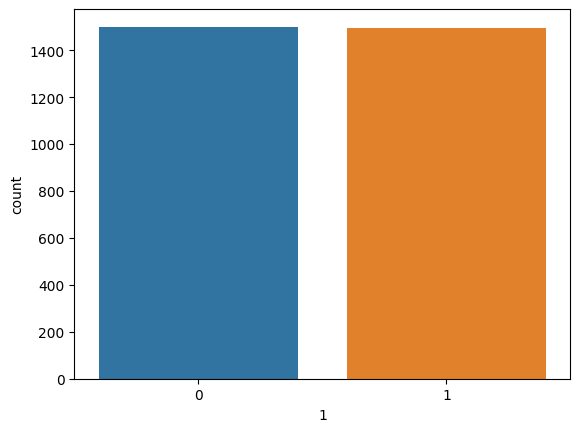

In [ ]:
sns.countplot(x=df[1])

In [ ]:
import neattext.functions as nfx

dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [ ]:
data = pd.DataFrame()
data['review'] = df[0]
data['tag'] = df[1]
data.head()

,review,tag
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [ ]:
data['review'] = df[0].apply(nfx.remove_userhandles)
data['review'] = data['review'].apply(nfx.remove_stopwords)
data['review'] = data['review'].apply(nfx.remove_punctuations)
data['review'] = data['review'].apply(nfx.remove_urls)
data['review'] = data['review'].apply(nfx.remove_multiple_spaces)
data['review'] = data['review'].apply(nfx.remove_currency_symbols)
data['review'] = data['review'].apply(nfx.remove_shortwords)
data['review'] = data['review'].apply(nfx.remove_emojis)
data['review'] = data['review'].apply(nfx.remove_dates)
data['review'] = data['review'].apply(nfx.remove_phone_numbers)
data['review'] = data['review'].apply(nfx.remove_accents)
data['review'] = data['review'].apply(nfx.remove_hashtags)
data['review'] = data['review'].apply(nfx.remove_html_tags)
data['review'] = data['review'].apply(nfx.remove_non_ascii)
data['review'] = data['review'].apply(nfx.remove_puncts)
data['review'] = data['review'].apply(nfx.remove_special_characters)

In [ ]:
data.head()

,review,tag
0,plug converter,0
1,Good case Excellent value,1
2,Great jawbone,1
3,Tied charger conversations lasting minutesMAJO...,0
4,great,1


In [ ]:
data['review'] = data['review'].str.lower()
data.head()

,review,tag
0,plug converter,0
1,good case excellent value,1
2,great jawbone,1
3,tied charger conversations lasting minutesmajo...,0
4,great,1


In [ ]:
import tensorflow as tf
import nltk
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Tokenization
stop_words = set(stopwords.words('english'))
data['review'] = data['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['review'])
X = tokenizer.texts_to_sequences(data['review'])
X = pad_sequences(X, padding='post', maxlen=100)


In [ ]:
y = np.array(data['tag'])
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
y = y[indices]
num_validation_samples = int(0.1 * X.shape[0])
X_train = X[:-num_validation_samples]
y_train = y[:-num_validation_samples]
X_test = X[-num_validation_samples:]
y_test = y[-num_validation_samples:]

In [ ]:
X

array([[ 618,    0,    0, ...,    0,    0,    0],
       [ 203, 2703,  553, ...,    0,    0,    0],
       [  36,   46,    0, ...,    0,    0,    0],
       ...,
       [  51,  536,   33, ...,    0,    0,    0],
       [ 400, 1742, 1743, ...,    0,    0,    0],
       [  22,   16, 1935, ...,    0,    0,    0]], dtype=int32)

In [ ]:
#CNN
model = Sequential()
model.add(Embedding(5000, 32, input_length=100))
model.add(Conv1D(32, 7, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(32, 7, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 32)           160000    
                                                                 
 conv1d_2 (Conv1D)           (None, 94, 32)            7200      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 18, 32)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 12, 32)            7200      
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_1 (Dense)             (None, 1)                

In [ ]:
model.fit(X_train, y_train, epochs=25, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/25
43/43 [==============================] - 1s 20ms/step - loss: 0.2991 - accuracy: 0.8787 - val_loss: 0.9729 - val_accuracy: 0.5217
Epoch 2/25
43/43 [==============================] - 1s 32ms/step - loss: 0.2412 - accuracy: 0.9021 - val_loss: 1.0738 - val_accuracy: 0.5151
Epoch 3/25
43/43 [==============================] - 2s 53ms/step - loss: 0.2037 - accuracy: 0.9154 - val_loss: 1.2022 - val_accuracy: 0.4883
Epoch 4/25
43/43 [==============================] - 1s 24ms/step - loss: 0.1729 - accuracy: 0.9310 - val_loss: 1.3199 - val_accuracy: 0.4849
Epoch 5/25
43/43 [==============================] - 1s 19ms/step - loss: 0.1472 - accuracy: 0.9395 - val_loss: 1.3872 - val_accuracy: 0.5084
Epoch 6/25
43/43 [==============================] - 1s 20ms/step - loss: 0.1291 - accuracy: 0.9447 - val_loss: 1.5291 - val_accuracy: 0.4816
Epoch 7/25
43/43 [==============================] - 1s 19ms/step - loss: 0.1161 - accuracy: 0.9496 - val_loss: 1.5964 - val_accuracy: 0.4749
Epoch 8/25
43

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

10/10 [==============================] - 0s 4ms/step - loss: 2.5905 - accuracy: 0.4883
Test loss: 2.5904593467712402
Test accuracy: 0.4882943034172058
